# Heart Disease Analysis using Artificial Neural Network 

**Dataset :**

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

One file has been "processed", that one containing the Cleveland database. All four unprocessed files also exist in this directory.

To see Test Costs (donated by Peter Turney), please see the folder "Costs"

**Step 1**:EDA (Exploratory Data Analysis<br>
**Step 2**:Artificial Neural Network

In [73]:
#importing the libraries
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
from keras.utils import to_categorical
from keras import optimizers
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing the dataset
df=pd.read_csv("heart.csv")

In [3]:
np.shape(df)

(303, 14)

In [4]:
print (df.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


# Step 1: EDA (Exploratory Data Analysis)

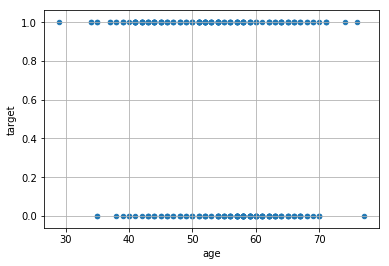

In [5]:
#plotting the dataset using seaborn
df.plot(kind="scatter",x="age",y="target");
#kind type scatter
plt.grid()
#plot.grid will show the grid
plt.show()
#show function will show the plot result

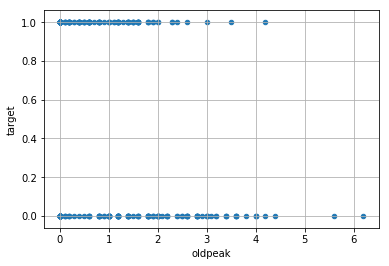

In [6]:
#plotting the dataset using seaborn
df.plot(kind="scatter",x="oldpeak",y="target");
#kind type scatter
plt.grid()
#plot.grid will show the grid
plt.show()
#show function will show the plot result

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
#this is the number who survived and not survived
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

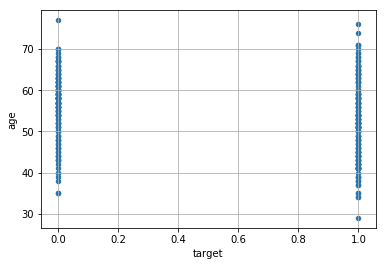

In [11]:
#plotting the dataset using seaborn
df.plot(kind="scatter",x="target",y="age");
#kind type scatter
plt.grid()
#plot.grid will show the grid
plt.show()
#show function will show the plot result

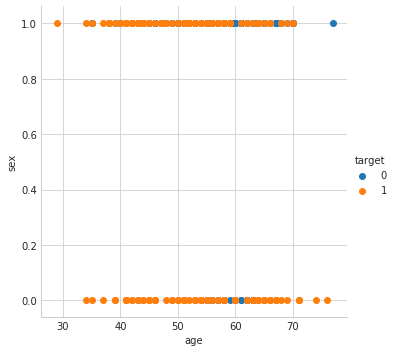

In [12]:
#adding the white grid style 
sns.set_style("whitegrid");
#adding datapoint colour and size
sns.FacetGrid(df, hue="target",size=5)\
        .map(plt.scatter, "age","sex")\
        .add_legend(); #legend fuction will describe class color
plt.show();
    

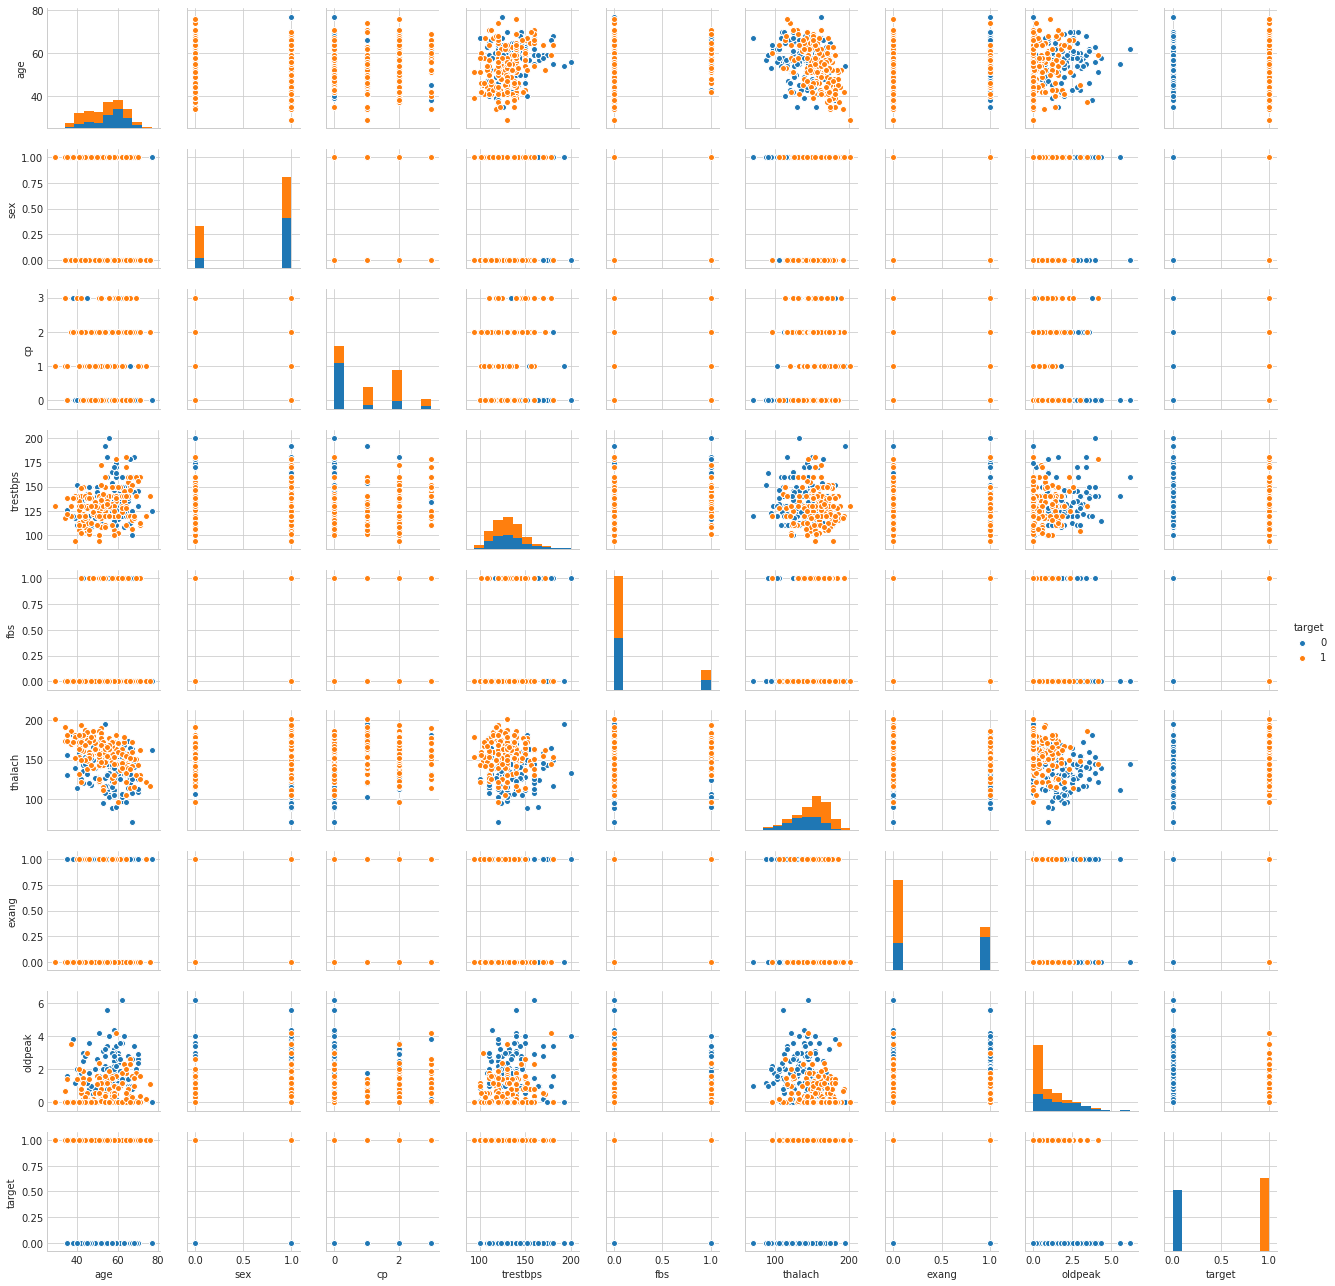

In [16]:
#pairplot on Habeman dataset
plt.close()
sns.pairplot(df,hue="target",vars=['age', 'sex', 'cp', 'trestbps', 'fbs','thalach',
       'exang', 'oldpeak', 'target'],size=2)
plt.show()

In [17]:
def dens_plot(features,class_var):
    #adding the white grid style 
    sns.set_style(style="whitegrid")
    #adding datapoint colour and size
    sns.FacetGrid(data=df, hue=class_var,size=5)\
        .map(sns.distplot,features)\
        .add_legend()

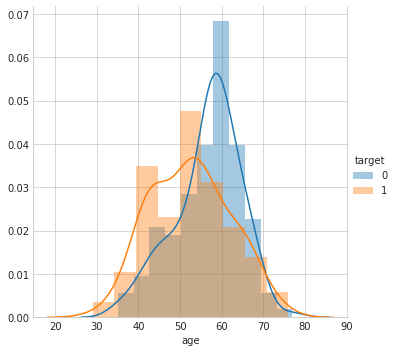

In [20]:
dens_plot("age","target")
plt.show()

# Observations from the above PDFs and CDFs :

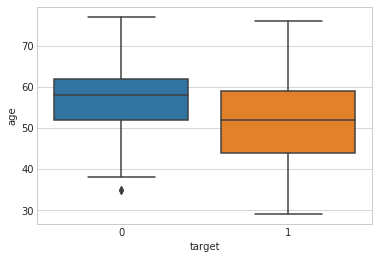

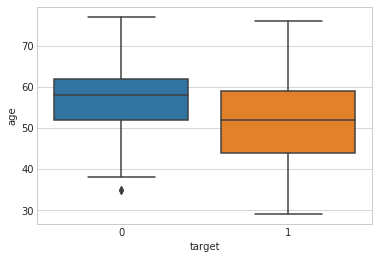

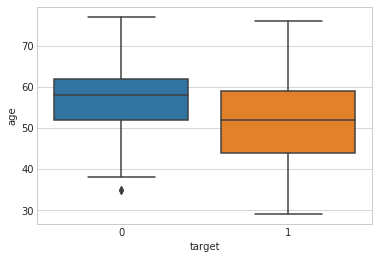

In [21]:
#Box Plot for the feature axillary nodes
sns.boxplot(x = 'target', y ='age', data = df)
plt.show()
#Box Plot for the feature Age
sns.boxplot(x = 'target',y = 'age', data = df)
plt.show()
#Box Plot for the feature Year of Operations
sns.boxplot(x = 'target', y = 'age', data = df)
plt.show()

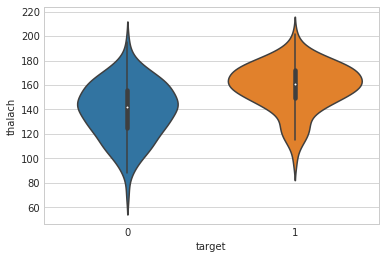

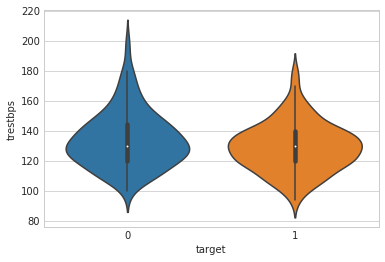

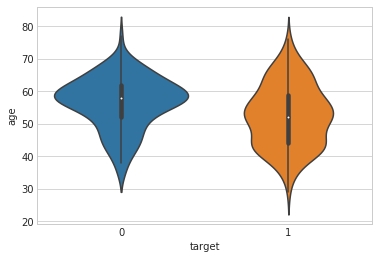

In [22]:
#Violin Plots for Axillary_Nodes
sns.violinplot(x = "target", y = "thalach", data = df, size = 8)
plt.show()

#Violin Plots for Operation_Year
sns.violinplot(x = "target", y = "trestbps", data = df, size = 8)
plt.show()

#Violin Plots for Age
sns.violinplot(x = "target", y = "age", data = df, size = 8)
plt.show()


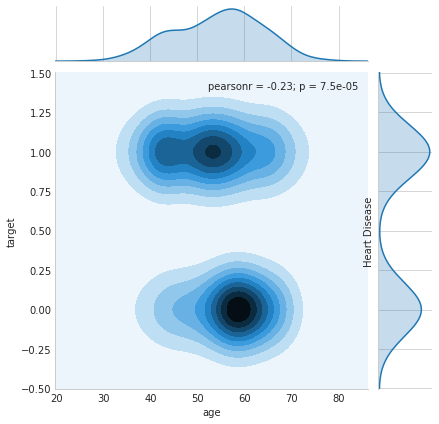

In [23]:
sns.jointplot(data=df, x="age",y="target", kind="kde")
plt.ylabel("Heart Disease")
plt.show()

# Step 2 Artificial Neural Network (ANN)

In [105]:
# Importing the dataset
dataset = pd.read_csv('heart.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Splitting the Dataset into two parts

In [139]:
X = dataset.iloc[:,0:13]
y = dataset.iloc[:,13]

In [140]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Step 2 - Now let's make the ANN!

In [141]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.layers import Activation, Dense
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 13))

# Adding the second hidden layer
model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# Compiling the ANN
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])
model.summary()
# Fitting the ANN to the Training set
history=model.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs =500,verbose=0)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_101 (Dense)            (None, 6)                 84        
_________________________________________________________________
dense_102 (Dense)            (None, 6)                 42        
_________________________________________________________________
dense_103 (Dense)            (None, 1)                 7         
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________


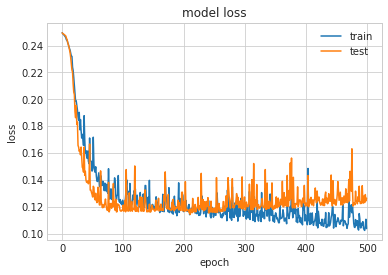

In [142]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='left')
plt.show()